<a href="https://colab.research.google.com/github/Asif123375/Computational-Physics/blob/main/Bender_Schmidt_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: MD.ASIF
# Reg: 2017132028

## Numerical Solution of PDE-Parabolic Using Bender_Schmidt_Method:

In [ ]:
# Import necessary libraries
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

def fun(i):
  """ This function will calculate the boundary value of u(x,t=0)= sin(pi*x), this condition might be change for some other problems"""
  """ return all the possible value of u for different value of x at range(0->1, step_size = 0.2):"""
  pi = 3.1416
  x = np.sin(pi*i)
  return x

def Parabolic_Bender_Schmidt_method(h=0.2, k=0.02, c=1):
  """ This function calculate the final value of u """
  """ return u as len(x) by len(t) matrix, t,x"""

  # Working formula: u[i,j+1] =  lamda * (u[i-1, j] + u[i+1, j]) - (1 - 2*lamda)u[i,j]
  # for the case of our problem lamda = 0.5, and i suggest choose the value of k & h such that lamda should be 0.5
  # So, Working formula after reduce u[i,j+1] = lamda * (u[i-1, j] + u[i+1, j])
  # calculate the value of lamda
  # given value h = 0.2 , k = 0.02, c =1.0 
  lamda = (k / (c*h**2))
  # default value of x at range(0->1, step_size = 0.2)
  x = np.linspace(0,1,6)
  # default value of t at range(0->0.1, step_size=0.02)
  t = np.linspace(0,0.1,6)
  # initialize the u as a empty matrix of size (len(x) by len(t)).
  u = np.zeros((len(t), len(x)))

  # fill the value in u which is given as condition by the help of a for loop
  for i in range(len(x)-1):
    u[0,i] = fun(x[i])
  
  # finaly using reducing working formula calculate all possibe value of u
  for i in range(1, len(t)):
    for j in range(1, len(x)-1):
      u[i,j] = lamda*(u[i-1, j-1] + u[i-1, j+1]) - (1-2*lamda)*u[i-1,j]

  return u,t,x
  


##  Now Showing our Results as DataFrame, in the DataFarme x-coordinate = x, y-coordinate = t

In [ ]:
get_U,t,x = Parabolic_Bender_Schmidt_method()
df = pd.DataFrame(get_U)
df.index = t
df = df.rename(columns={1:0.2,2:0.4, 3:0.6, 4:0.8,5:1.0})
df

,0.0,0.2,0.4,0.6,0.8,1.0
0.00,0.0,0.587786,0.951057,0.951055,0.587780,0.0
0.02,0.0,0.475529,0.769421,0.769419,0.475528,0.0
0.04,0.0,0.384710,0.622474,0.622474,0.384709,0.0
0.06,0.0,0.311237,0.503592,0.503592,0.311237,0.0
0.08,0.0,0.251796,0.407414,0.407415,0.251796,0.0
0.10,0.0,0.203707,0.329605,0.329605,0.203707,0.0


# Plot U as Funtion of Time for different value of X

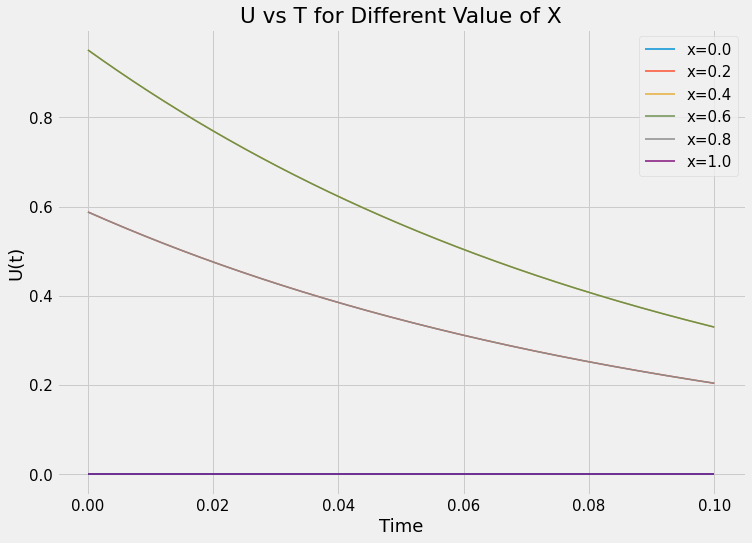

In [ ]:
df1 = df.copy()
# Interpolate the Data For a Smooth Curve
f1 = interp1d(df1.index, df1[0.0],kind='cubic')
f2 = interp1d(df1.index, df1[0.2],kind='cubic')
f3 = interp1d(df1.index, df1[0.4],kind='cubic')
f4 = interp1d(df1.index, df1[0.6],kind='cubic')
f5 = interp1d(df1.index, df1[0.8],kind='cubic')
f6 = interp1d(df1.index, df1[1.0],kind='cubic')

df2 = pd.DataFrame()
new_index = np.linspace(0,0.1,500)
df2[0] = f1(new_index)
df2[0.2] = f2(new_index)
df2[0.4] = f3(new_index)
df2[0.6] = f4(new_index)
df2[0.8] = f5(new_index)
df2[1.0] = f6(new_index)
df2.index = new_index

matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.linewidth']=1.5
ax2 = df2.plot(figsize=(11,8), grid=True)
ax2.set_title('U vs T for Different Value of X')
ax2.set_xlabel("Time")
ax2.set_ylabel("U(t)")
ax2.legend(["x=0.0", "x=0.2","x=0.4","x=0.6","x=0.8","x=1.0"]);

#  Plot U as Funtion of x for different value of T(Time)

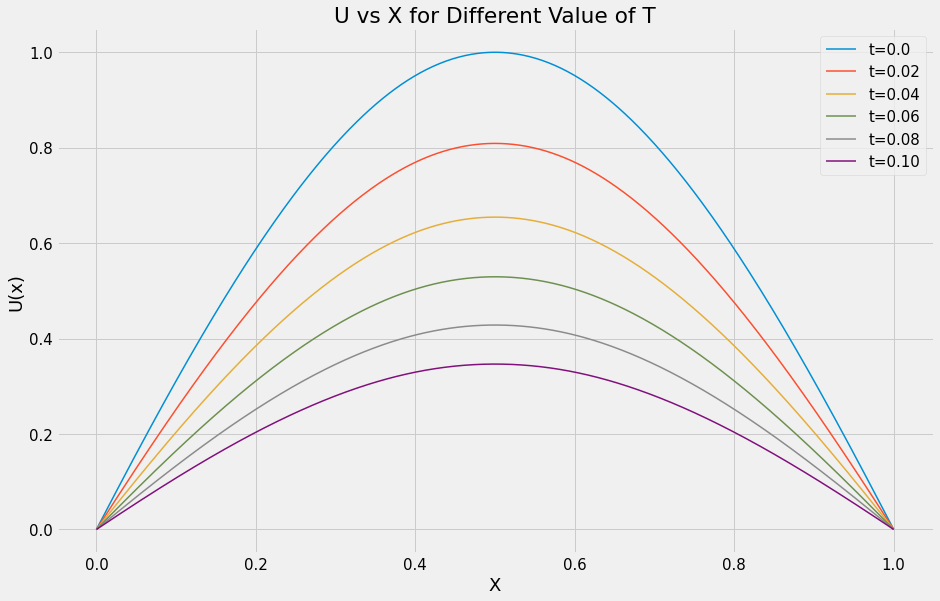

In [ ]:
df3 = df.T.copy()
# Interpolate The Data for a Smooth Curve
f1 = interp1d(df3.index, df3[0.0],kind='cubic')
f2 = interp1d(df3.index, df3[0.02],kind='cubic')
f3 = interp1d(df3.index, df3[0.04],kind='cubic')
f4 = interp1d(df3.index, df3[0.06],kind='cubic')
f5 = interp1d(df3.index, df3[0.08],kind='cubic')
f6 = interp1d(df3.index, df3[0.10],kind='cubic')

df2 = pd.DataFrame()
new_index = np.linspace(0,1,500)
df2[0.0] = f1(new_index)
df2[0.02] = f2(new_index)
df2[0.04] = f3(new_index)
df2[0.06] = f4(new_index)
df2[0.08] = f5(new_index)
df2[.10] = f6(new_index)
df2.index = new_index

matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.linewidth']=1.5
ax2 = df2.plot(figsize=(14,9), grid=True)
ax2.set_title('U vs X for Different Value of T')
ax2.set_xlabel("X")
ax2.set_ylabel("U(x)")
ax2.legend(["t=0.0", "t=0.02","t=0.04","t=0.06","t=0.08","t=0.10"]);